<a href="https://colab.research.google.com/github/nehadubey1205/NLP-college/blob/main/Assignment2_NLP_NehaDubey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1-a

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [ ]:
data= pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/NLP Assignment/a2_text (2).csv',sep='\t')

In [ ]:
data.head(2)



,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...


In [ ]:
data.dtypes

tweet_id      int64
sentiment    object
author       object
content      object
dtype: object

In [ ]:
data.isnull().sum()

tweet_id     0
sentiment    0
author       0
content      0
dtype: int64

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data["Length"]=data["content"].str.len()
data.head()
#data['length'] = data['content'].apply(lambda x: len(x))
#print(data)
#The pandas built-in methods are more robust than using 'apply'. For example, this method will raise a TypeError, 
#if NaN is present in the string column, but the built-in .str.len will handle NaN.'''
#https://stackoverflow.com/questions/42815768/pandas-adding-column-with-the-length-of-other-column-as-value

,tweet_id,sentiment,author,content,Length
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,92
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,60
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,35
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,36
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,86


In [ ]:
import re

In [ ]:
def check_find_punctuations(text):
    
    # regular expression containing
    # all punctuation
    result = re.findall(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*', 
                        text)
      
    # form a string
    string = "".join(result)
      
    # list of strings return
    return list(string)
    
# creating new column name
# as a punctuation_used and 
# applying user defined function
# on each rows of Comments column
data['punctuation_used'] = data['content'].apply(
                         lambda x : check_find_punctuations(x)
                         )
  
data.head(3)

,tweet_id,sentiment,author,content,Length,punctuation_used
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,92,"[@, =, []"
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,60,"[., ., ., ., ., .]"
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,35,"[., ., ., ., ., .]"


In [ ]:
data['punct']=[len(i) for i in data['punctuation_used']]
data.head()

,tweet_id,sentiment,author,content,Length,punctuation_used,punct
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,92,"[@, =, []",3
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,60,"[., ., ., ., ., .]",6
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,35,"[., ., ., ., ., .]",6
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,36,[!],1
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,86,"[@, ,, .]",3


In [ ]:
data["mentions"]=data["content"].str.count("@")
data.head()

,tweet_id,sentiment,author,content,Length,punctuation_used,punct,Stopwords,mentions
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,92,"[@, =, []",3,6,1
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,60,"[., ., ., ., ., .]",6,4,0
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,35,"[., ., ., ., ., .]",6,0,0
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,36,[!],1,3,0
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,86,"[@, ,, .]",3,6,1


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.corpus import stopwords    
stop_words = set(stopwords.words('english'))

#data['stopword'] = data['content'].str.split().apply(lambda x: len(set(x) & stop_words))
data['Stopwords'] = data['content'].apply(lambda x: len(set(x.split()) & stop_words))
data.head(5)

,tweet_id,sentiment,author,content,Length,punctuation_used,punct,Stopwords
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,92,"[@, =, []",3,6
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,60,"[., ., ., ., ., .]",6,4
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,35,"[., ., ., ., ., .]",6,0
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,36,[!],1,3
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,86,"[@, ,, .]",3,6


1-b

In [ ]:
data['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


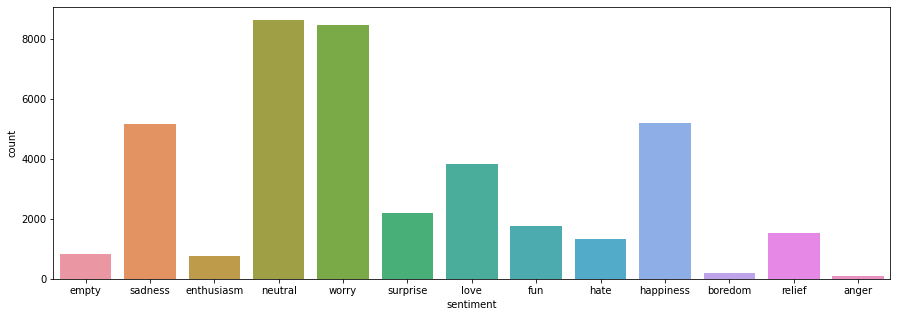

In [ ]:
#data['sentiment'].value_counts().plot(kind='bar')
# using seaborn
import seaborn as sns
plt.figure(figsize=(15,5))
sns.countplot(data['sentiment'])
plt.show()

In [ ]:
df['Sentiment'] = data['sentiment']
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    -4
1    -1
2    -1
3     1
4     0
Name: sentiment, dtype: object

In [ ]:
#print(data['sentiment'].corr(data['punct']))

In [ ]:
#print(data['comment'].corr(data['Length']))
#print(data['comment'].corr(data['Stopwords']))
#print(data['comment'].corr(data['mentions']))

0.03067884710469673
0.13374636859242683
0.22271770159368698


In [ ]:
#sentiment.punct.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green","grey", "pink", "orange","black", "white", "blue","violet","brown"])

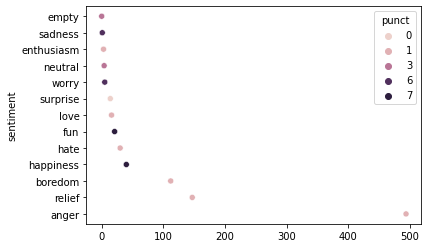

In [ ]:
#import seaborn as sns
#sns.scatterplot(data=data, x=data.index, y='sentiment', hue='punct')

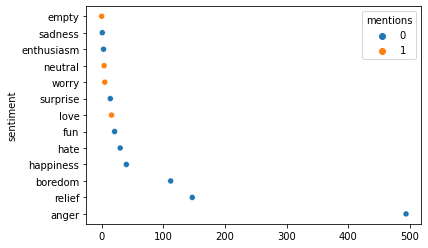

In [ ]:
#import seaborn as sns
#sns.scatterplot(data=data,  y='sentiment', x=data.index, hue='mentions')

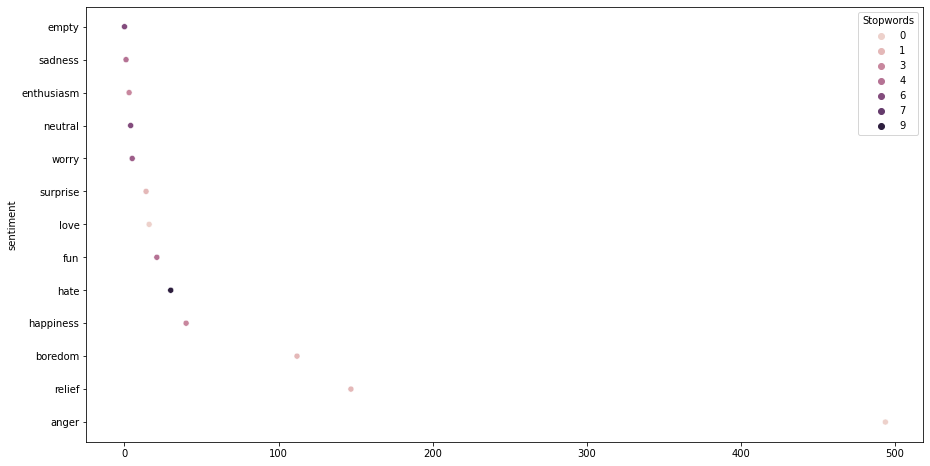

In [ ]:
#import seaborn as sns
#sns.scatterplot(data=data, x=data.index, y='sentiment', hue='Stopwords')

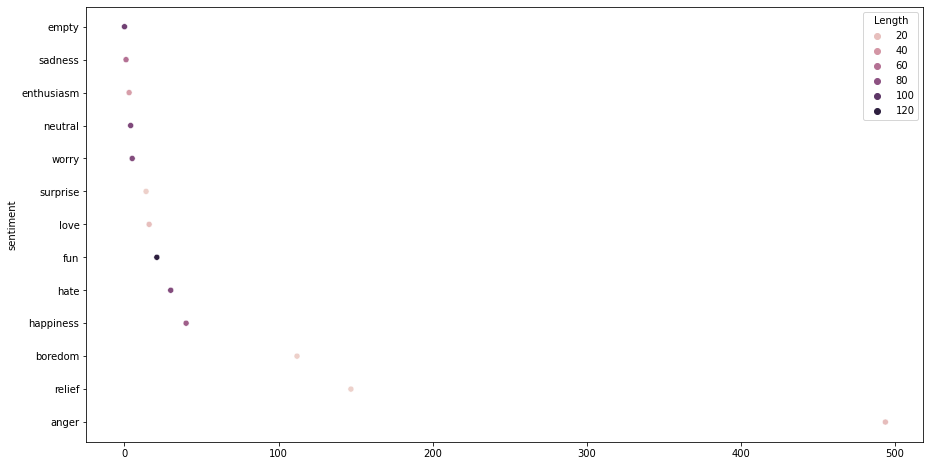

In [ ]:
#import seaborn as sns
#sns.scatterplot(data=data, x=data.index, y='sentiment', hue='Length')

In [ ]:
unique = set(data['sentiment'].str.replace('[^a-zA-Z ]', '').str.lower().str.split(' ').sum())
print(list(sorted(unique)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry']


In [ ]:
#labels_dict = {0:'neutral', 1:'empty', 2:'', 3:'anger', 4:'worry', 5:'surprise'}
#data['New_sent'] = data['sentiment'].map(labels_dict )
#data.head()

In [ ]:
#hotel_groups = pd.Series([-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6], 
#index=pd.Index(name='sentiment', data=['anger', 'boredome', 'empty', 'worry','hate','sadness','neutral','enthusiasm','fun','happiness','love','relief','surprise']))
#data['hotel'] = hotel_groups


In [ ]:
# replacing values
data['sentiment'].replace(['anger', 'boredome', 'empty', 'worry','hate','sadness','neutral','enthusiasm','fun','happiness','love','relief','surprise'],
                        [-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6], inplace=True)
''' data.insert(2,                        # column position
             "comment",                   # column name
             [10, 20, 45, 33, 22, 11],  # column values
             True)                      # Allow duplicates
print(df_obj) '''

' data.insert(2,                        # column position\n             "comment",                   # column name\n             [10, 20, 45, 33, 22, 11],  # column values\n             True)                      # Allow duplicates\nprint(df_obj) '

In [ ]:
list(data)

['tweet_id',
 'sentiment',
 'author',
 'content',
 'Length',
 'punctuation_used',
 'punct',
 'Stopwords',
 'mentions']

In [ ]:
#list(data)
data.columns = ['tweet_id', 'comment', 'author', 'content','Length',
 'punctuation_used',
 'punct',
 'Stopwords',
 'mentions']

In [ ]:
data.head()

,tweet_id,comment,author,content,Length,punctuation_used,punct,Stopwords,mentions
0,1956967341,-4,xoshayzers,@tiffanylue i know i was listenin to bad habi...,92,"[@, =, []",3,6,1
1,1956967666,-1,wannamama,Layin n bed with a headache ughhhh...waitin o...,60,"[., ., ., ., ., .]",6,4,0
2,1956967696,-1,coolfunky,Funeral ceremony...gloomy friday...,35,"[., ., ., ., ., .]",6,0,0
3,1956967789,1,czareaquino,wants to hang out with friends SOON!,36,[!],1,3,0
4,1956968416,0,xkilljoyx,@dannycastillo We want to trade with someone w...,86,"[@, ,, .]",3,6,1


In [ ]:
data.insert(2,                        # column position
            df['Sentiment'],  # column values
             True)                      # Allow duplicates
print(data)

In [ ]:
print(data['sentiment'].corr(data['Length']))
print(data['sentiment'].corr(data['Stopwords']))
print(data['sentiment'].corr(data['mentions']))
print(data['sentiment'].corr(data['punct']))


TypeError: ignored

In [ ]:
#import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2

In [ ]:
df = pd.DataFrame(data, columns = ["content"])
df.head()

,content
0,@tiffanylue i know i was listenin to bad habi...
1,Layin n bed with a headache ughhhh...waitin o...
2,Funeral ceremony...gloomy friday...
3,wants to hang out with friends SOON!
4,@dannycastillo We want to trade with someone w...


**Question-2**

In [ ]:
# when @ has been removed
D2 =df["content"].str.replace("@","")
D2.head()

0    tiffanylue i know  i was listenin to bad habit...
1    Layin n bed with a headache  ughhhh...waitin o...
2                  Funeral ceremony...gloomy friday...
3                 wants to hang out with friends SOON!
4    dannycastillo We want to trade with someone wh...
Name: content, dtype: object

In [ ]:
D1 = df
D1.head()

,content
0,@tiffanylue i know i was listenin to bad habi...
1,Layin n bed with a headache ughhhh...waitin o...
2,Funeral ceremony...gloomy friday...
3,wants to hang out with friends SOON!
4,@dannycastillo We want to trade with someone w...


In [ ]:
import io